In [82]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')

import utils.stats as stats
import utils.testing_gen as gen
import utils.loading as load
import utils.nn_gen as nn_gen
from utils.tools import array2List

In [87]:
PATH = ['/master/code/last/finished_exps/baseline']

In [118]:
class id():
    def __init__(self):
        self.dropout = None
        self.l1 = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None
        self.action_r = None


    def load_id(self, path:str):
        try:
            if 'scaleL1' in path:
                nb_layer_match = re.search(r'scaleL1-(\d+)', path)
                self.l1 = int(nb_layer_match.group(1))
            dropout_match = re.search(r'dropout-(\d+)', path)


            if 'action' in path:
                self.action_r = 1
            else:
                0



            self.dropout = int(dropout_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_action-{self.action_r}_dropout{self.dropout}'

In [119]:
def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res

### 

In [120]:
res = []

for path in PATH:
    res.extend(get_path_models(path))

In [121]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/baseline_action-react_best.pt >>> {'dropout': 0, 'l1': 0, 'path': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/baseline_action-react_best.pt', 'loss': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/eval_list.npy', 'eval_sim_loss': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy', 'action_r': 1}
/master/code/last/finished_exps/baseline/mt-baseline_action-react_noisy_scaleL1-0_dropout-1/model_trained/baseline_action-react_best.pt >>> {'dropout': 1, 'l1': 0, 'path': '/master/code/last/finished_exps/baseline/mt-baseline_action-react_no

In [122]:
list_lost = [r.loss for r in res]
list_eval = [r.eval_loss for r in res]
list_sim = [r.eval_sim_loss for r in res]
labels = [r.label() for r in res]

In [123]:
min_eval = []
for eval_vals in tqdm(list_eval):
    v = np.load(eval_vals)
    min_eval.append(np.min(v))

100%|██████████| 8/8 [00:00<00:00, 107.84it/s]


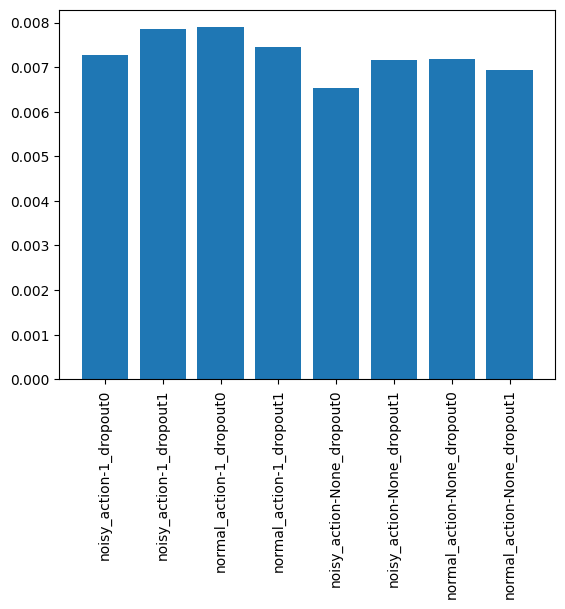

In [124]:
plt.bar(labels, min_eval)
plt.xticks(rotation=90)
plt.show()

8it [00:01,  5.15it/s]


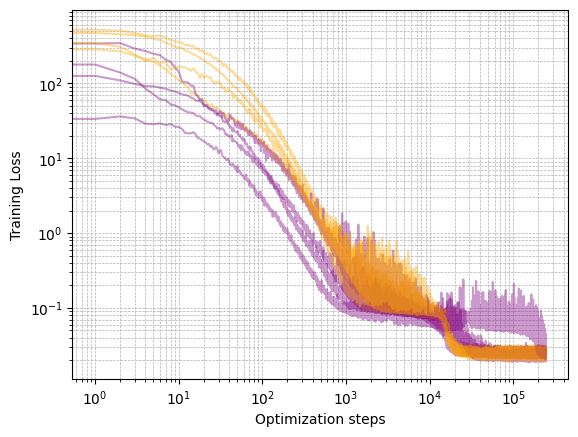

In [125]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

8it [00:00, 68.00it/s]


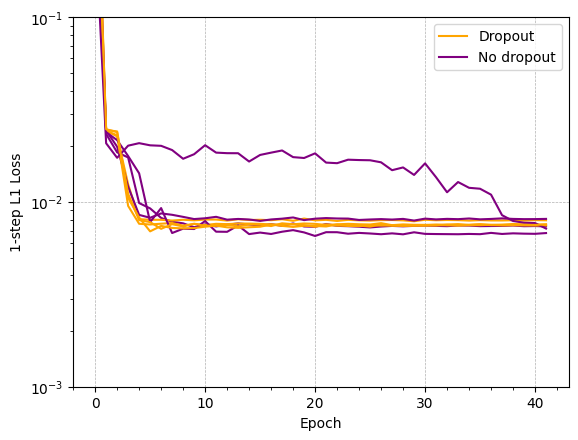

In [126]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

8it [00:00, 81.91it/s]


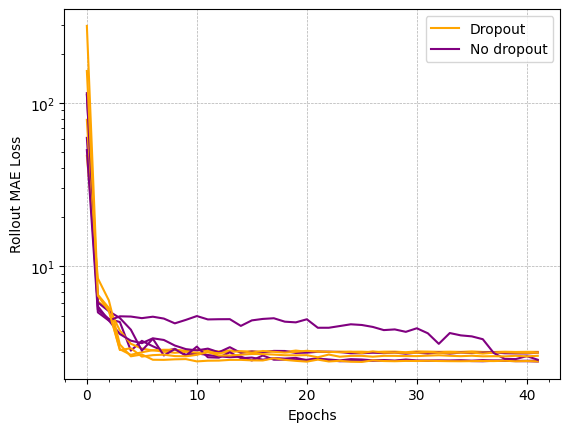

In [127]:
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_sim)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()

8it [00:01,  5.96it/s]


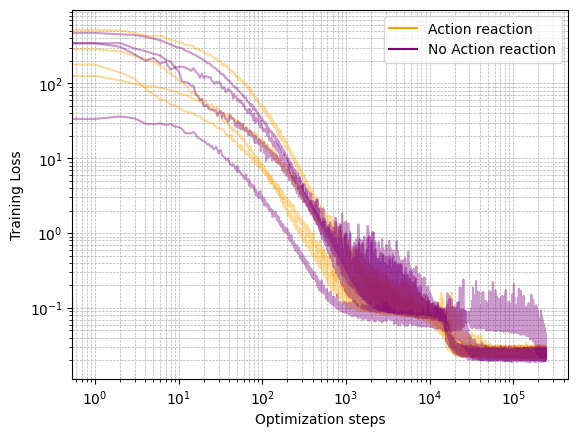

In [129]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.action_r == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

dropout_line = mlines.Line2D([], [], color='orange', label='Action reaction')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No Action reaction')

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.legend(handles=[dropout_line, no_dropout_line])

plt.show()

8it [00:00, 85.95it/s]


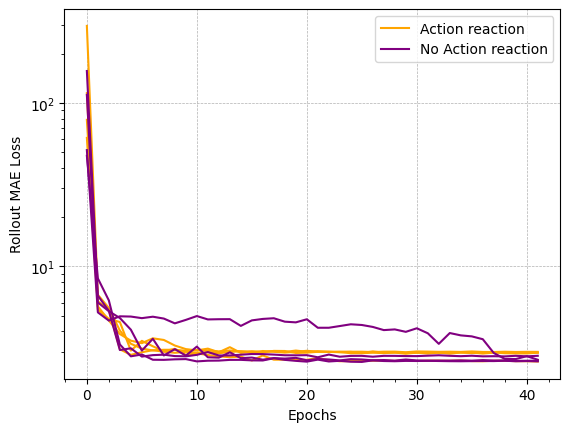

In [128]:
color = []
layerNorm = 0

for r in res:
    if r.action_r == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_sim)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Action reaction')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No Action reaction')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()